In [1]:
# Python > 3.5 required
import sys
assert sys.version_info >= (3, 5)

# importing relevant modules

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as px
import missingno as msno

# to make this notebook's output stable across runs
np.random.seed(42)

# display plots inline
%matplotlib inline

# reconfigure IPython shell to output multiple results per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Load in the Data

inline_data = pd.read_csv('../Pivot_Bio_Exercise/Task_inlineData.csv')

viability_data = pd.read_excel('../Pivot_Bio_Exercise/Task_ViabilityData.xlsx', sheet_name=0, header=0, skiprows=[1])

ferm_metadata = pd.read_excel('../Pivot_Bio_Exercise/Task_FermentationMetadata.xlsx', sheet_name=0, header=0, skiprows=[1]
                             , converters= {'ferm_harvest_datetime': pd.to_datetime ,
                                            'ferm_inoculation_datetime': pd.to_datetime })

## Overview of the Data

In [3]:
# Fermentation Metadata

ferm_metadata.head(2)
ferm_metadata.info()
ferm_metadata.shape

experiment_name  ferm_treatment_id ferm_produced  ferm_reactor_number  \
0            ExpA                1.0           A15                  1.0   
1            ExpA                2.0           A15                  2.0   

  ferm_strain  ferm_total_inoculation_volume ferm_strain_ratio  \
0         A_B                            0.1               9_1   
1         A_B                            0.1               5_5   

   ferm_setpoint_pH  ferm_setpoint_DO  ferm_vvm  ferm_setpoint_agitation\n  \
0               7.0              60.0       0.5                      500.0   
1               7.0              60.0       0.5                      500.0   

   ferm_setpoint_temp ferm_media_nickname ferm_inoculation_datetime  \
0                30.0           100% MedA       2022-03-01 11:37:00   
1                30.0           100% MedA       2022-03-01 11:38:00   

  ferm_harvest_datetime  ferm_harvesttime_hrs ferm_plating_media_nickname  \
0            2022-03-04             60.383333                         PIB   
1            2022-03-04             60.366667                         PIB   

   ferm_plate_hours_incubated  ferm_plate_temp_incubated  
0                        41.0                       30.0  
1                        41.0                       30.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   experiment_name                12 non-null     object        
 1   ferm_treatment_id              12 non-null     float64       
 2   ferm_produced                  12 non-null     object        
 3   ferm_reactor_number            12 non-null     float64       
 4   ferm_strain                    12 non-null     object        
 5   ferm_total_inoculation_volume  12 non-null     float64       
 6   ferm_strain_ratio              12 non-null     object        
 7   ferm_setpoint_pH               12 non-null     float64       
 8   ferm_setpoint_DO               12 non-null     float64       
 9   ferm_vvm                       12 non-null     float64       
 10  ferm_setpoint_agitation
       12 non-null     float64       
 11  ferm_setpoint_temp 

(351, 19)

In [4]:
# Viability Data

viability_data.head(7)
viability_data.info()
viability_data.shape

experiment_name  ferm_treatment_id ferm_enumerated_strain  \
0            ExpA                1.0                      A   
1            ExpA                1.0                    A_B   
2            ExpA                1.0                      B   
3            ExpA                2.0                      A   
4            ExpA                2.0                    A_B   
5            ExpA                2.0                      B   
6            ExpA                3.0                      A   

   ferm_OD_wavelength  ferm_OD_reading  ferm_OD_dilution  ferm_OD_final  \
0                 NaN              NaN               NaN            NaN   
1                 NaN              NaN               NaN            NaN   
2                 NaN              NaN               NaN            NaN   
3                 NaN              NaN               NaN            NaN   
4                 NaN              NaN               NaN            NaN   
5                 NaN              NaN               NaN            NaN   
6                 NaN              NaN               NaN            NaN   

   ferm_measure_timepoint  ferm_CFUpermL_1  
0                     6.0     3.200000e+08  
1                     6.0     1.160000e+09  
2                     6.0     8.400000e+08  
3                     6.0     1.120000e+09  
4                     6.0     1.400000e+09  
5                     6.0     2.800000e+08  
6                     6.0     1.160000e+09

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   experiment_name         144 non-null    object 
 1   ferm_treatment_id       144 non-null    float64
 2   ferm_enumerated_strain  144 non-null    object 
 3   ferm_OD_wavelength      0 non-null      float64
 4   ferm_OD_reading         0 non-null      float64
 5   ferm_OD_dilution        0 non-null      float64
 6   ferm_OD_final           0 non-null      float64
 7   ferm_measure_timepoint  144 non-null    float64
 8   ferm_CFUpermL_1         144 non-null    float64
dtypes: float64(7), object(2)
memory usage: 31.9+ KB


(452, 9)

In [5]:
# Inline Data

inline_data.head(2)
inline_data.info()
inline_data.shape

Date Time  CS2-1-dO  CS2-2-dO  CS2-3-dO  CS2-4-dO  CS2-5-dO  CS2-6-dO  \
0  3/1/2022 17:43     75.36     60.27     59.29     60.20     60.19      0.07   
1  3/1/2022 17:44     71.02     58.80     59.38     59.55     58.91      0.03   

   CS2-7-dO  CS2-8-dO  CS2-9-dO  ...  CS2-3-TOTAL_BASE_ADDITION  \
0       0.0     60.37     48.04  ...                        0.0   
1       0.0     61.08     61.42  ...                        NaN   

   CS2-4-TOTAL_BASE_ADDITION  CS2-5-TOTAL_BASE_ADDITION  \
0                        0.0                        0.0   
1                        NaN                        NaN   

   CS2-6-TOTAL_BASE_ADDITION  CS2-7-TOTAL_BASE_ADDITION  \
0                        0.0                        0.0   
1                        NaN                        NaN   

   CS2-8-TOTAL_BASE_ADDITION  CS2-9-TOTAL_BASE_ADDITION  \
0                        0.0                        0.0   
1                        NaN                        NaN   

   CS2-10-TOTAL_BASE_ADDITION  CS2-11-TOTAL_BASE_ADDITION  \
0                         0.0                         0.0   
1                         NaN                         NaN   

   CS2-12-TOTAL_BASE_ADDITION  
0                         0.0  
1                         NaN  

[2 rows x 109 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2366 entries, 0 to 2365
Columns: 109 entries, Date Time to CS2-12-TOTAL_BASE_ADDITION
dtypes: float64(84), int64(12), object(13)
memory usage: 2.0+ MB


(2366, 109)

## Fermentation metadata - Cleaning

In [6]:
# Checking for Nulls

ferm_metadata.isnull().sum()

experiment_name                  339
ferm_treatment_id                339
ferm_produced                    339
ferm_reactor_number              339
ferm_strain                      339
ferm_total_inoculation_volume    339
ferm_strain_ratio                339
ferm_setpoint_pH                 339
ferm_setpoint_DO                 339
ferm_vvm                         339
ferm_setpoint_agitation\n        339
ferm_setpoint_temp               339
ferm_media_nickname              339
ferm_inoculation_datetime        339
ferm_harvest_datetime            339
ferm_harvesttime_hrs             339
ferm_plating_media_nickname      339
ferm_plate_hours_incubated       339
ferm_plate_temp_incubated        339
dtype: int64

In [7]:
# Checking the number of unique items per col

ferm_metadata.nunique()

experiment_name                   1
ferm_treatment_id                12
ferm_produced                     1
ferm_reactor_number              12
ferm_strain                       1
ferm_total_inoculation_volume     1
ferm_strain_ratio                 3
ferm_setpoint_pH                  1
ferm_setpoint_DO                  1
ferm_vvm                          1
ferm_setpoint_agitation\n         1
ferm_setpoint_temp                1
ferm_media_nickname               3
ferm_inoculation_datetime        11
ferm_harvest_datetime             1
ferm_harvesttime_hrs             11
ferm_plating_media_nickname       1
ferm_plate_hours_incubated        1
ferm_plate_temp_incubated         1
dtype: int64

In [8]:
# Dropping the 339 empty lines in the dataset

ferm_metadata.dropna(inplace=True)
ferm_metadata.shape # Checking shape to confirm

(12, 19)

In [9]:
# Adding harvest time (hrs) to ferm_inoculation_time to get 
# correct ferm_harvest_datetime

ferm_metadata['ferm_harvest_datetime'] = ferm_metadata['ferm_inoculation_datetime'] + pd.to_timedelta(ferm_metadata['ferm_harvesttime_hrs'], unit='h')
ferm_metadata.head(2)

experiment_name  ferm_treatment_id ferm_produced  ferm_reactor_number  \
0            ExpA                1.0           A15                  1.0   
1            ExpA                2.0           A15                  2.0   

  ferm_strain  ferm_total_inoculation_volume ferm_strain_ratio  \
0         A_B                            0.1               9_1   
1         A_B                            0.1               5_5   

   ferm_setpoint_pH  ferm_setpoint_DO  ferm_vvm  ferm_setpoint_agitation\n  \
0               7.0              60.0       0.5                      500.0   
1               7.0              60.0       0.5                      500.0   

   ferm_setpoint_temp ferm_media_nickname ferm_inoculation_datetime  \
0                30.0           100% MedA       2022-03-01 11:37:00   
1                30.0           100% MedA       2022-03-01 11:38:00   

          ferm_harvest_datetime  ferm_harvesttime_hrs  \
0 2022-03-03 23:59:59.999998800             60.383333   
1 2022-03-04 00:00:00.000001200             60.366667   

  ferm_plating_media_nickname  ferm_plate_hours_incubated  \
0                         PIB                        41.0   
1                         PIB                        41.0   

   ferm_plate_temp_incubated  
0                       30.0  
1                       30.0

In [10]:
# Since it may be useful to split the strain ratio in terms of A & B , I'll do that
# as well as divide by 100 to get the volume in mL

ferm_metadata[['Amt_A_mL', 'Amt_B_mL']] = ferm_metadata['ferm_strain_ratio'].str.split('_', expand=True)
ferm_metadata['Amt_A_mL'] = ferm_metadata['Amt_A_mL'].astype('float') / 100
ferm_metadata['Amt_B_mL'] = ferm_metadata['Amt_B_mL'].astype('float') / 100
ferm_metadata.head(2)

experiment_name  ferm_treatment_id ferm_produced  ferm_reactor_number  \
0            ExpA                1.0           A15                  1.0   
1            ExpA                2.0           A15                  2.0   

  ferm_strain  ferm_total_inoculation_volume ferm_strain_ratio  \
0         A_B                            0.1               9_1   
1         A_B                            0.1               5_5   

   ferm_setpoint_pH  ferm_setpoint_DO  ferm_vvm  ...  ferm_setpoint_temp  \
0               7.0              60.0       0.5  ...                30.0   
1               7.0              60.0       0.5  ...                30.0   

   ferm_media_nickname ferm_inoculation_datetime  \
0            100% MedA       2022-03-01 11:37:00   
1            100% MedA       2022-03-01 11:38:00   

          ferm_harvest_datetime ferm_harvesttime_hrs  \
0 2022-03-03 23:59:59.999998800            60.383333   
1 2022-03-04 00:00:00.000001200            60.366667   

   ferm_plating_media_nickname ferm_plate_hours_incubated  \
0                          PIB                       41.0   
1                          PIB                       41.0   

   ferm_plate_temp_incubated  Amt_A_mL  Amt_B_mL  
0                       30.0      0.09      0.01  
1                       30.0      0.05      0.05  

[2 rows x 21 columns]

In [11]:
# Several cols need to have their data types changed

convert_dict = {'ferm_treatment_id' : int , 
                'ferm_reactor_number' : int}

ferm_metadata = ferm_metadata.astype(convert_dict)
ferm_metadata.dtypes

experiment_name                          object
ferm_treatment_id                         int64
ferm_produced                            object
ferm_reactor_number                       int64
ferm_strain                              object
ferm_total_inoculation_volume           float64
ferm_strain_ratio                        object
ferm_setpoint_pH                        float64
ferm_setpoint_DO                        float64
ferm_vvm                                float64
ferm_setpoint_agitation\n               float64
ferm_setpoint_temp                      float64
ferm_media_nickname                      object
ferm_inoculation_datetime        datetime64[ns]
ferm_harvest_datetime            datetime64[ns]
ferm_harvesttime_hrs                    float64
ferm_plating_media_nickname              object
ferm_plate_hours_incubated              float64
ferm_plate_temp_incubated               float64
Amt_A_mL                                float64
Amt_B_mL                                

## Viability Data - Cleaning

In [12]:
# Checking for Nulls and Unique records

viability_data.isnull().sum()
viability_data.nunique()

experiment_name           308
ferm_treatment_id         308
ferm_enumerated_strain    308
ferm_OD_wavelength        452
ferm_OD_reading           452
ferm_OD_dilution          452
ferm_OD_final             452
ferm_measure_timepoint    308
ferm_CFUpermL_1           308
dtype: int64

experiment_name            1
ferm_treatment_id         12
ferm_enumerated_strain     3
ferm_OD_wavelength         0
ferm_OD_reading            0
ferm_OD_dilution           0
ferm_OD_final              0
ferm_measure_timepoint     4
ferm_CFUpermL_1           99
dtype: int64

In [13]:
# Dropping the last 308 empty rows

viability_data.drop(viability_data.tail(308).index, inplace=True)
viability_data.isnull().sum()

experiment_name             0
ferm_treatment_id           0
ferm_enumerated_strain      0
ferm_OD_wavelength        144
ferm_OD_reading           144
ferm_OD_dilution          144
ferm_OD_final             144
ferm_measure_timepoint      0
ferm_CFUpermL_1             0
dtype: int64

In [14]:
# ferm_OD_wavelength , ferm_OD_reading, ferm_OD_dilution, and ferm_OD_final 
# appear to all be empty cols and will be dropped

viability_data.drop(viability_data.columns[[3,4,5,6]], axis=1, inplace=True)

In [15]:
# Some of the cols need to be converted to different data types

convert_dict = {'ferm_treatment_id' : int , 
                'ferm_measure_timepoint' : int}

viability_data = viability_data.astype(convert_dict)
viability_data.dtypes

experiment_name            object
ferm_treatment_id           int64
ferm_enumerated_strain     object
ferm_measure_timepoint      int64
ferm_CFUpermL_1           float64
dtype: object

In [16]:
# Assuming only the A_B data is 'truly' relavent, we'll drop the others
# Also assuming that conc of A + conc of B = Conc A_B

viability_data = viability_data[viability_data['ferm_enumerated_strain'] == 'A_B'].reset_index()
viability_data = viability_data.drop('index', axis=1)
viability_data.head()
viability_data.shape

experiment_name  ferm_treatment_id ferm_enumerated_strain  \
0            ExpA                  1                    A_B   
1            ExpA                  2                    A_B   
2            ExpA                  3                    A_B   
3            ExpA                  4                    A_B   
4            ExpA                  5                    A_B   

   ferm_measure_timepoint  ferm_CFUpermL_1  
0                       6     1.160000e+09  
1                       6     1.400000e+09  
2                       6     1.360000e+09  
3                       6     1.440000e+09  
4                       6     1.320000e+09

(48, 5)

In [17]:
# Summary statistics for numerical cols

viability_data.describe()

ferm_treatment_id  ferm_measure_timepoint  ferm_CFUpermL_1
count          48.000000               48.000000     4.800000e+01
mean            6.500000               19.500000     1.149833e+10
std             3.488583               11.643645     1.043873e+10
min             1.000000                6.000000     5.600000e+08
25%             3.750000               10.500000     3.510000e+09
50%             6.500000               18.000000     6.160000e+09
75%             9.250000               27.000000     1.820000e+10
max            12.000000               36.000000     3.560000e+10

## Viability - Visualizations

<AxesSubplot:xlabel='ferm_measure_timepoint', ylabel='ferm_CFUpermL_1'>

''

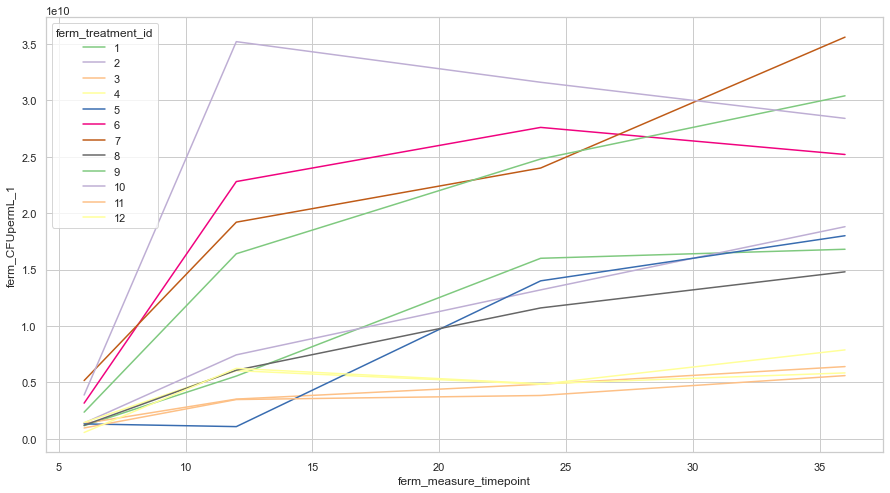

In [18]:
sns.set(style= 'whitegrid', rc = {'figure.figsize':(15,8)})
sns.lineplot( x = 'ferm_measure_timepoint',
             y = 'ferm_CFUpermL_1',
             data = viability_data ,
             hue = 'ferm_treatment_id',
             palette="Accent")
;

In [19]:
viability_data_36 = viability_data.loc[viability_data['ferm_measure_timepoint'] == 36].reset_index()
viability_data_36['Strain_Rank'] = viability_data_36['ferm_CFUpermL_1'].rank(ascending=False)
viability_data_36[['ferm_treatment_id','Strain_Rank', 'ferm_CFUpermL_1']].sort_values(by='Strain_Rank')

ferm_treatment_id  Strain_Rank  ferm_CFUpermL_1
6                   7          1.0     3.560000e+10
8                   9          2.0     3.040000e+10
9                  10          3.0     2.840000e+10
5                   6          4.0     2.520000e+10
1                   2          5.0     1.880000e+10
4                   5          6.0     1.800000e+10
0                   1          7.0     1.680000e+10
7                   8          8.0     1.480000e+10
3                   4          9.0     7.880000e+09
2                   3         10.0     6.400000e+09
11                 12         11.0     5.840000e+09
10                 11         12.0     5.600000e+09

Treatment ID's 7, 9, 10 and 6 show the highest final concentrations of TOTAL A_B strain conc

Treatments 2, 5, 1 and 8 form another group at around half the total A_B strain conc

Treamments 4, 3, 12 and 11 round out the bottom 4 hovering around a final concentration of 

In [20]:
top8_slice = ferm_metadata[ferm_metadata['ferm_treatment_id'].isin([7,9,10,6,2,5,1,8])] 
top8_strain_ratio_media = top8_slice[['ferm_treatment_id', 'ferm_strain_ratio','ferm_media_nickname']]
top8_strain_ratio_media

ferm_treatment_id ferm_strain_ratio ferm_media_nickname
0                  1               9_1           100% MedA
1                  2               5_5           100% MedA
4                  5               9_1           100% MedA
5                  6               5_5           200% MedA
6                  7               7_3           200% MedA
7                  8               5_5           100% MedA
8                  9               7_3           200% MedA
9                 10               9_1           200% MedA

## Inline Data - Cleaning

In [21]:
inline_data.head()

Date Time  CS2-1-dO  CS2-2-dO  CS2-3-dO  CS2-4-dO  CS2-5-dO  CS2-6-dO  \
0  3/1/2022 17:43     75.36     60.27     59.29     60.20     60.19      0.07   
1  3/1/2022 17:44     71.02     58.80     59.38     59.55     58.91      0.03   
2  3/1/2022 17:45     60.57     57.72     59.98     59.47     58.54      0.00   
3  3/1/2022 17:46     48.04     58.30     60.04     59.88     59.77      0.00   
4  3/1/2022 17:47     43.23     58.46     59.51     59.86     61.76      0.00   

   CS2-7-dO  CS2-8-dO  CS2-9-dO  ...  CS2-3-TOTAL_BASE_ADDITION  \
0       0.0     60.37     48.04  ...                        0.0   
1       0.0     61.08     61.42  ...                        NaN   
2       0.0     59.69     68.69  ...                        NaN   
3       0.0     56.91     72.37  ...                        NaN   
4       0.0     56.48     70.61  ...                        NaN   

   CS2-4-TOTAL_BASE_ADDITION  CS2-5-TOTAL_BASE_ADDITION  \
0                        0.0                        0.0   
1                        NaN                        NaN   
2                        NaN                        NaN   
3                        NaN                        NaN   
4                        NaN                        NaN   

   CS2-6-TOTAL_BASE_ADDITION  CS2-7-TOTAL_BASE_ADDITION  \
0                        0.0                        0.0   
1                        NaN                        NaN   
2                        NaN                        NaN   
3                        NaN                        NaN   
4                        NaN                        NaN   

   CS2-8-TOTAL_BASE_ADDITION  CS2-9-TOTAL_BASE_ADDITION  \
0                        0.0                        0.0   
1                        NaN                        NaN   
2                        NaN                        NaN   
3                        NaN                        NaN   
4                        NaN                        NaN   

   CS2-10-TOTAL_BASE_ADDITION  CS2-11-TOTAL_BASE_ADDITION  \
0                         0.0                         0.0   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   

   CS2-12-TOTAL_BASE_ADDITION  
0                         0.0  
1                         NaN  
2                         NaN  
3                         NaN  
4                         NaN  

[5 rows x 109 columns]

#### This set of data will need to be cleaned and transformed before it can be merged with the other data

In [22]:
# Converting the 'Date Time' col to datetime obj and setting it as the index

inline_data['Date Time'] = pd.to_datetime(inline_data['Date Time'])
inline_data = inline_data.set_index('Date Time')

In [23]:
# Transforming inline data to make it easier to use

inline_data.columns = inline_data.columns.str.split('-', expand = True) # Split col names at '-' delimiter
inline_data = inline_data.stack(level=[0,1]).reset_index().rename(columns={'level_1': 'SensorId','level_2': 'FermId'}) # Reposition the stripped col names into their respective new cols
inline_data.head(12)
inline_data.shape

Date Time SensorId FermId     Air   LH  N2      O2  \
0  2022-03-01 17:43:00      CS2      1   5.015  NaN   0  24.985   
1  2022-03-01 17:43:00      CS2     10   0.000  NaN   0  30.000   
2  2022-03-01 17:43:00      CS2     11  23.814  NaN   0   6.186   
3  2022-03-01 17:43:00      CS2     12  26.817  NaN   0   3.183   
4  2022-03-01 17:43:00      CS2      2   7.718  NaN   0  22.282   
5  2022-03-01 17:43:00      CS2      3  22.102  NaN   0   7.898   
6  2022-03-01 17:43:00      CS2      4  21.141  NaN   0   8.859   
7  2022-03-01 17:43:00      CS2      5   6.126  NaN   0  23.874   
8  2022-03-01 17:43:00      CS2      6   0.000  NaN   0  30.000   
9  2022-03-01 17:43:00      CS2      7   0.000  NaN   0  30.000   
10 2022-03-01 17:43:00      CS2      8  11.862  NaN   0  18.138   
11 2022-03-01 17:43:00      CS2      9   0.000  NaN   0  30.000   

    TOTAL_ACID_ADDITION  TOTAL_BASE_ADDITION  Temperature     dO    pH  
0                   NaN                  0.0        29.99  75.36  7.12  
1                   0.0                  0.0        30.02   1.74  7.01  
2                   0.0                  0.0        30.05  59.90  7.10  
3                   0.0                  0.0        29.97  59.03  7.01  
4                   NaN                  0.0        29.88  60.27  7.14  
5                   0.0                  0.0        29.92  59.29  7.07  
6                   0.0                  0.0        29.94  60.20  7.11  
7                   0.0                  0.0        30.00  60.19  7.11  
8                   0.0                  0.0        29.93   0.07  7.06  
9                   0.0                  0.0        30.03   0.00  7.12  
10                  0.0                  0.0        29.95  60.37  7.05  
11                  0.0                  0.0        30.05  48.04  6.93

(28392, 12)

In [24]:
# Removing NaN and replacing with 0

inline_data[['TOTAL_BASE_ADDITION','TOTAL_ACID_ADDITION']] = inline_data[['TOTAL_BASE_ADDITION','TOTAL_ACID_ADDITION']].fillna(0)

In [25]:
# Checking the datatypes and making any necessary changes

inline_data.dtypes

Date Time              datetime64[ns]
SensorId                       object
FermId                         object
Air                           float64
LH                             object
N2                              int64
O2                            float64
TOTAL_ACID_ADDITION           float64
TOTAL_BASE_ADDITION           float64
Temperature                   float64
dO                            float64
pH                            float64
dtype: object

In [26]:
convert_dict = {'FermId' : int,
                'N2' : float }

inline_data = inline_data.astype(convert_dict)
inline_data.dtypes

Date Time              datetime64[ns]
SensorId                       object
FermId                          int64
Air                           float64
LH                             object
N2                            float64
O2                            float64
TOTAL_ACID_ADDITION           float64
TOTAL_BASE_ADDITION           float64
Temperature                   float64
dO                            float64
pH                            float64
dtype: object

# Inline_data visualizations

### Below are plots of the sensor data for the various recording metrics, listed in descending order of highest total concentration 

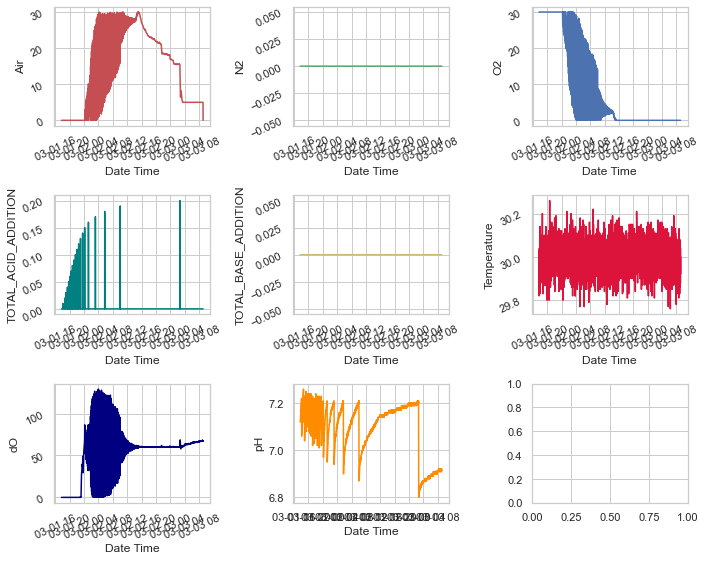

In [27]:
# visuals of time-series metrics for Fermentation 7

df = inline_data[inline_data['FermId'] == 7 ]

fig,ax =  plt.subplots( 3, 3,
                       figsize = ( 10, 8))
  
sns.lineplot( x = 'Date Time', y = 'Air', 
             color = 'r', data = df, 
             ax = ax[0][0])
  
ax[0][0].tick_params(labelrotation = 25)
sns.lineplot( x = 'Date Time', y = 'N2', 
             color = 'g', data = df,
             ax = ax[0][1])
  
ax[0][1].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'O2', 
             color = 'b', data = df,
             ax = ax[0][2])

ax[0][2].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'TOTAL_ACID_ADDITION', 
             color = 'teal', data = df,
             ax = ax[1][0])
  
ax[1][0].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'TOTAL_BASE_ADDITION', 
             color = 'y', data = df, 
             ax = ax[1][1])
  
ax[1][1].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'Temperature', 
             color = 'crimson', data = df, 
             ax = ax[1][2])

ax[1][2].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'dO', 
             color = 'navy', data = df, 
             ax = ax[2][0])

ax[2][0].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'pH', 
             color = 'darkorange', data = df, 
             ax = ax[2][1])


fig.tight_layout(pad = 1.2);

/Users/robertlewis/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/robertlewis/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/robertlewis/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


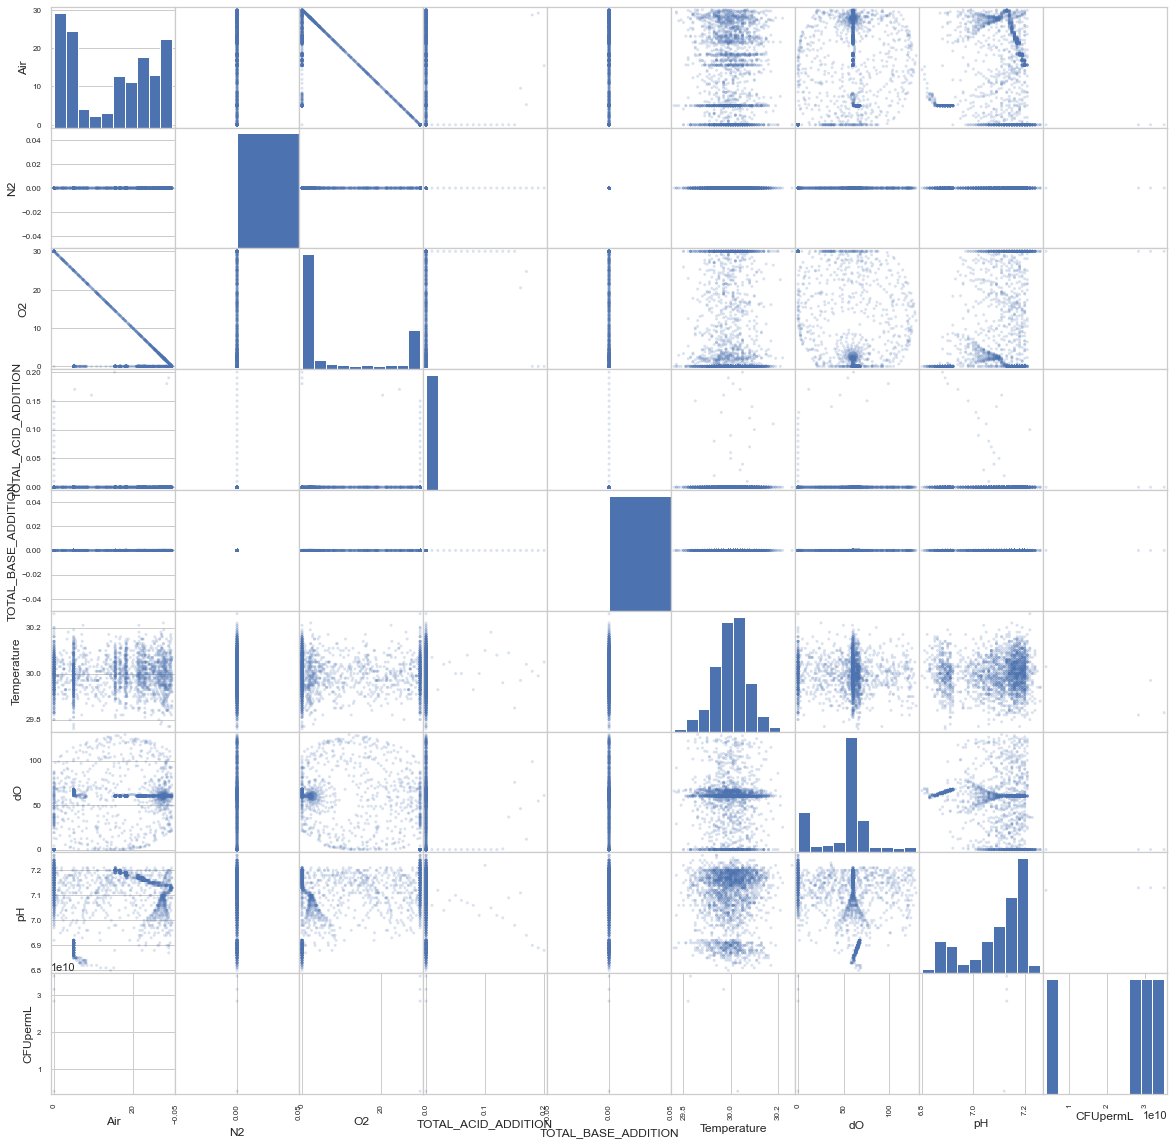

In [28]:
df = inline_data[inline_data['FermId'] == 7 ].drop(columns='FermId')
df = df.assign(CFUpermL = viability_data['ferm_CFUpermL_1'])

pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(20,20))
plt.show();

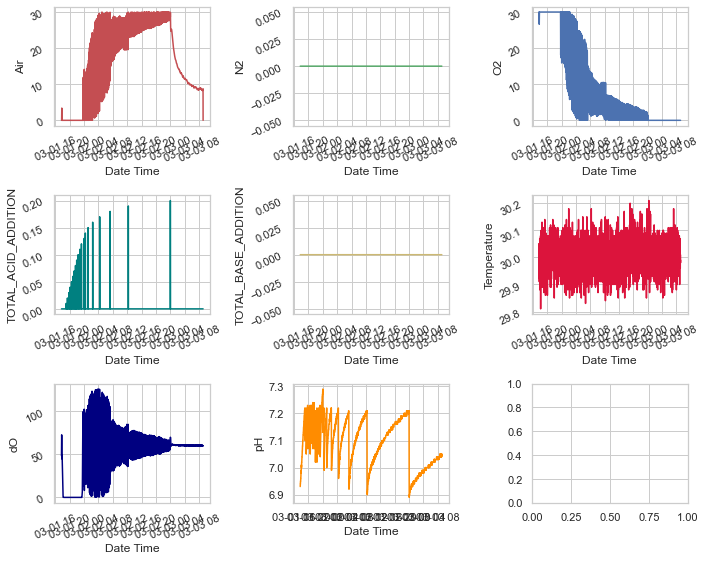

In [29]:
# visuals of time-series metrics for Fermentation 9 

df = inline_data[inline_data['FermId'] == 9 ]

fig,ax =  plt.subplots( 3, 3,
                       figsize = ( 10, 8))
  
sns.lineplot( x = 'Date Time', y = 'Air', 
             color = 'r', data = df, 
             ax = ax[0][0])
  
ax[0][0].tick_params(labelrotation = 25)
sns.lineplot( x = 'Date Time', y = 'N2', 
             color = 'g', data = df,
             ax = ax[0][1])
  
ax[0][1].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'O2', 
             color = 'b', data = df,
             ax = ax[0][2])

ax[0][2].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'TOTAL_ACID_ADDITION', 
             color = 'teal', data = df,
             ax = ax[1][0])
  
ax[1][0].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'TOTAL_BASE_ADDITION', 
             color = 'y', data = df, 
             ax = ax[1][1])
  
ax[1][1].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'Temperature', 
             color = 'crimson', data = df, 
             ax = ax[1][2])

ax[1][2].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'dO', 
             color = 'navy', data = df, 
             ax = ax[2][0])

ax[2][0].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'pH', 
             color = 'darkorange', data = df, 
             ax = ax[2][1])


fig.tight_layout(pad = 1.2);

/Users/robertlewis/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/robertlewis/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/robertlewis/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


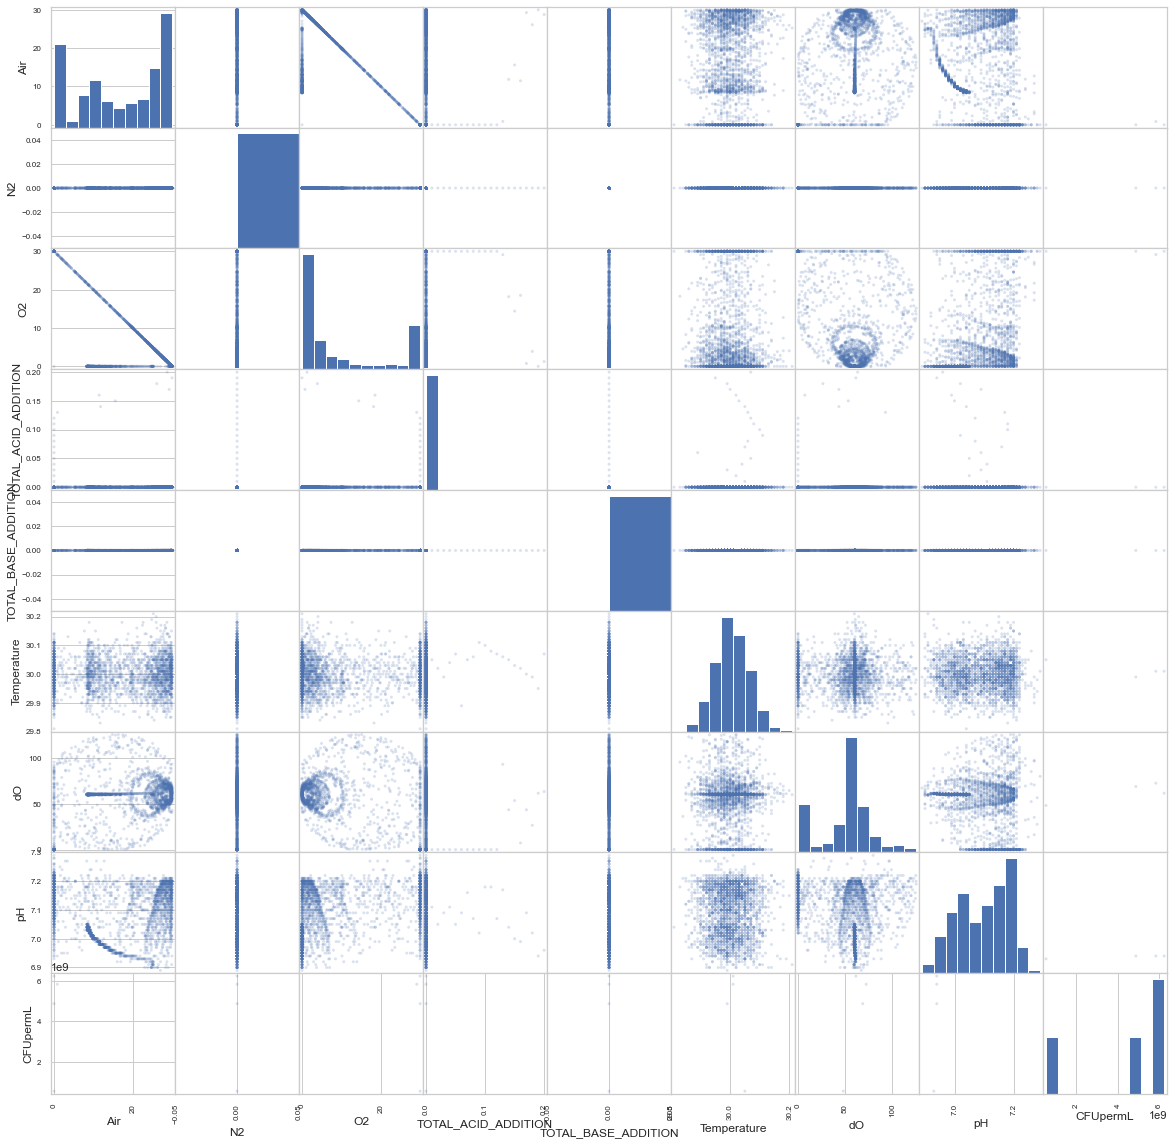

In [30]:
df = inline_data[inline_data['FermId'] == 9 ].drop(columns='FermId')
df = df.assign(CFUpermL = viability_data['ferm_CFUpermL_1'])

pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(20,20))
plt.show();

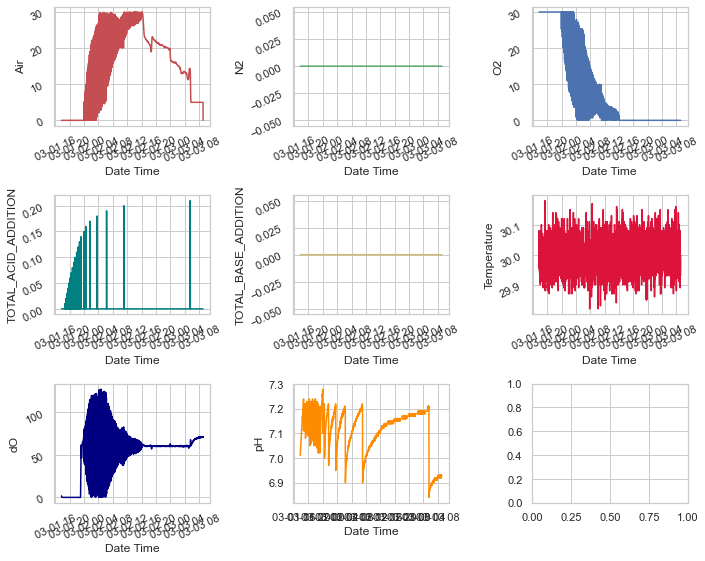

In [31]:
# visuals of time-series metrics for Fermentation 10

df = inline_data[inline_data['FermId'] == 10 ]

fig,ax =  plt.subplots( 3, 3,
                       figsize = ( 10, 8))
  
sns.lineplot( x = 'Date Time', y = 'Air', 
             color = 'r', data = df, 
             ax = ax[0][0])
  
ax[0][0].tick_params(labelrotation = 25)
sns.lineplot( x = 'Date Time', y = 'N2', 
             color = 'g', data = df,
             ax = ax[0][1])
  
ax[0][1].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'O2', 
             color = 'b', data = df,
             ax = ax[0][2])

ax[0][2].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'TOTAL_ACID_ADDITION', 
             color = 'teal', data = df,
             ax = ax[1][0])
  
ax[1][0].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'TOTAL_BASE_ADDITION', 
             color = 'y', data = df, 
             ax = ax[1][1])
  
ax[1][1].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'Temperature', 
             color = 'crimson', data = df, 
             ax = ax[1][2])

ax[1][2].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'dO', 
             color = 'navy', data = df, 
             ax = ax[2][0])

ax[2][0].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'pH', 
             color = 'darkorange', data = df, 
             ax = ax[2][1])


fig.tight_layout(pad = 1.2);

/Users/robertlewis/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/robertlewis/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/robertlewis/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


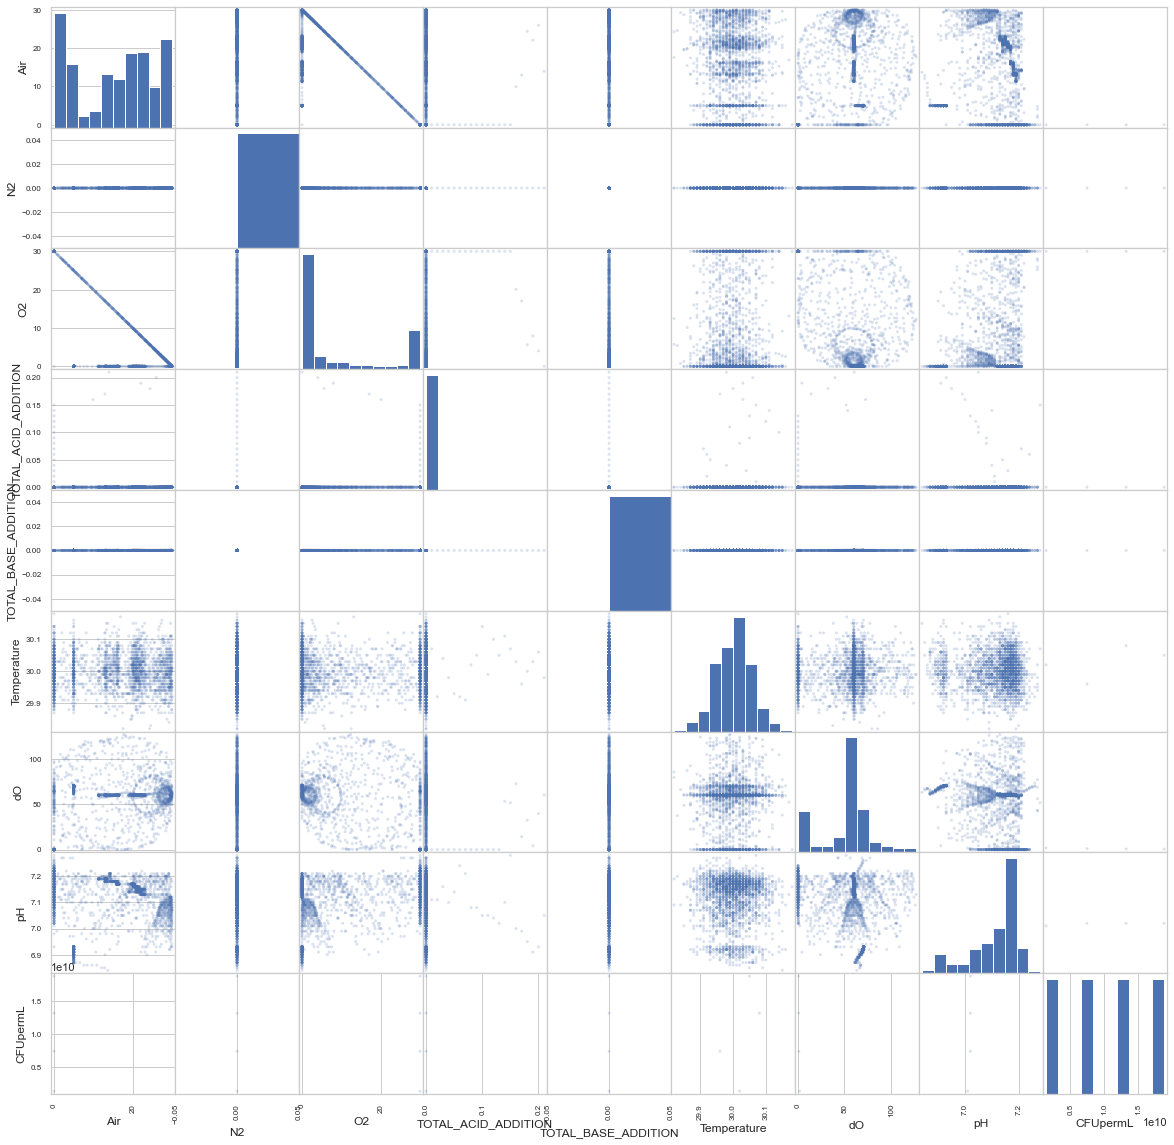

In [32]:
df = inline_data[inline_data['FermId'] == 10 ].drop(columns='FermId')
df = df.assign(CFUpermL = viability_data['ferm_CFUpermL_1'])

pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(20,20))
plt.show();

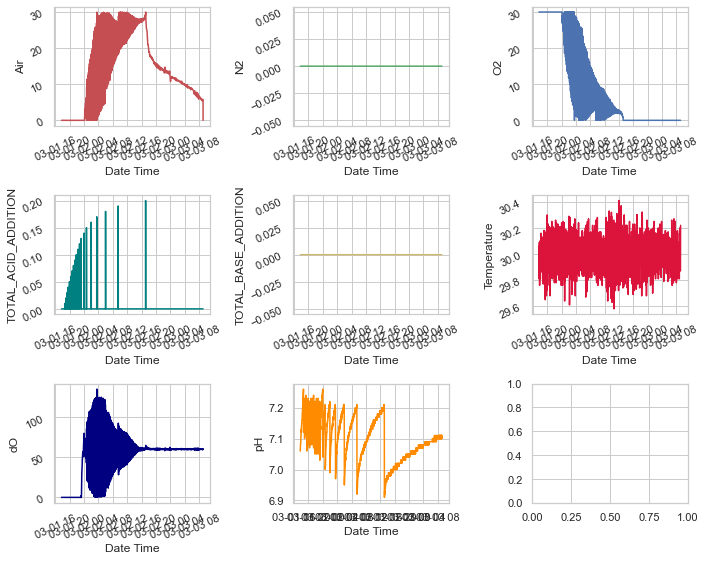

In [33]:
# visuals of time-series metrics for Fermentation 6

df = inline_data[inline_data['FermId'] == 6 ]

fig,ax =  plt.subplots( 3, 3,
                       figsize = ( 10, 8))
  
sns.lineplot( x = 'Date Time', y = 'Air', 
             color = 'r', data = df, 
             ax = ax[0][0])
  
ax[0][0].tick_params(labelrotation = 25)
sns.lineplot( x = 'Date Time', y = 'N2', 
             color = 'g', data = df,
             ax = ax[0][1])
  
ax[0][1].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'O2', 
             color = 'b', data = df,
             ax = ax[0][2])

ax[0][2].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'TOTAL_ACID_ADDITION', 
             color = 'teal', data = df,
             ax = ax[1][0])
  
ax[1][0].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'TOTAL_BASE_ADDITION', 
             color = 'y', data = df, 
             ax = ax[1][1])
  
ax[1][1].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'Temperature', 
             color = 'crimson', data = df, 
             ax = ax[1][2])

ax[1][2].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'dO', 
             color = 'navy', data = df, 
             ax = ax[2][0])

ax[2][0].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'pH', 
             color = 'darkorange', data = df, 
             ax = ax[2][1])


fig.tight_layout(pad = 1.2);

/Users/robertlewis/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/robertlewis/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/robertlewis/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


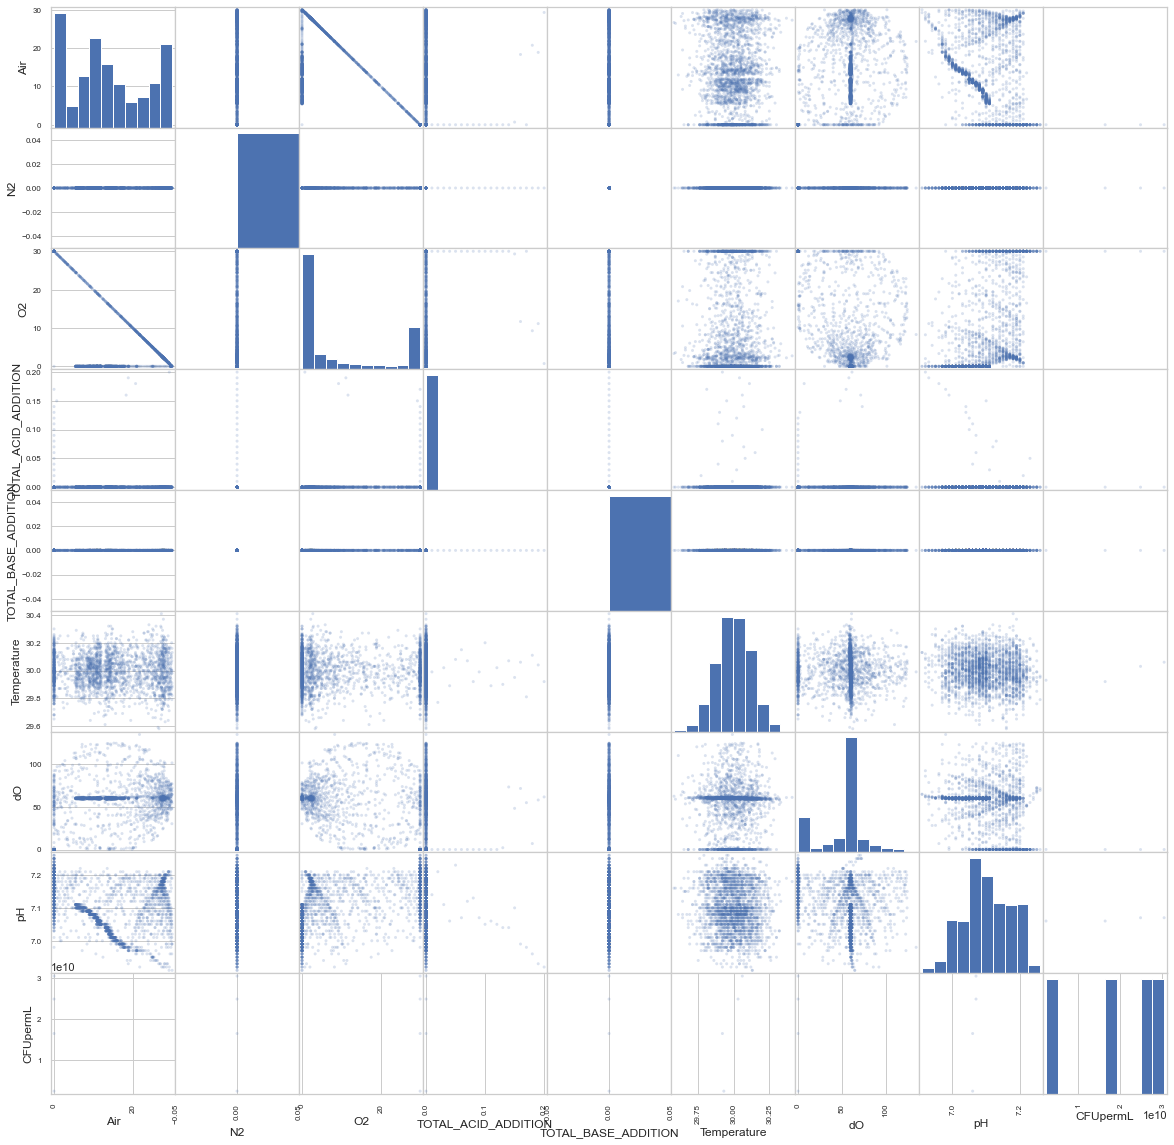

In [34]:
df = inline_data[inline_data['FermId'] == 6 ].drop(columns='FermId')
df = df.assign(CFUpermL = viability_data['ferm_CFUpermL_1'])

pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(20,20))
plt.show();

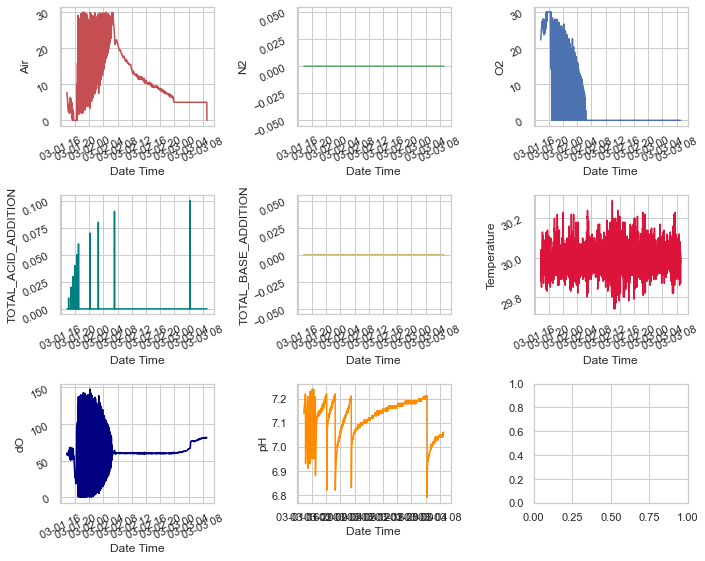

In [35]:
# visuals of time-series metrics for Fermentation 2

df = inline_data[inline_data['FermId'] == 2 ]

fig,ax =  plt.subplots( 3, 3,
                       figsize = ( 10, 8))
  
sns.lineplot( x = 'Date Time', y = 'Air', 
             color = 'r', data = df, 
             ax = ax[0][0])
  
ax[0][0].tick_params(labelrotation = 25)
sns.lineplot( x = 'Date Time', y = 'N2', 
             color = 'g', data = df,
             ax = ax[0][1])
  
ax[0][1].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'O2', 
             color = 'b', data = df,
             ax = ax[0][2])

ax[0][2].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'TOTAL_ACID_ADDITION', 
             color = 'teal', data = df,
             ax = ax[1][0])
  
ax[1][0].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'TOTAL_BASE_ADDITION', 
             color = 'y', data = df, 
             ax = ax[1][1])
  
ax[1][1].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'Temperature', 
             color = 'crimson', data = df, 
             ax = ax[1][2])

ax[1][2].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'dO', 
             color = 'navy', data = df, 
             ax = ax[2][0])

ax[2][0].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'pH', 
             color = 'darkorange', data = df, 
             ax = ax[2][1])


fig.tight_layout(pad = 1.2);

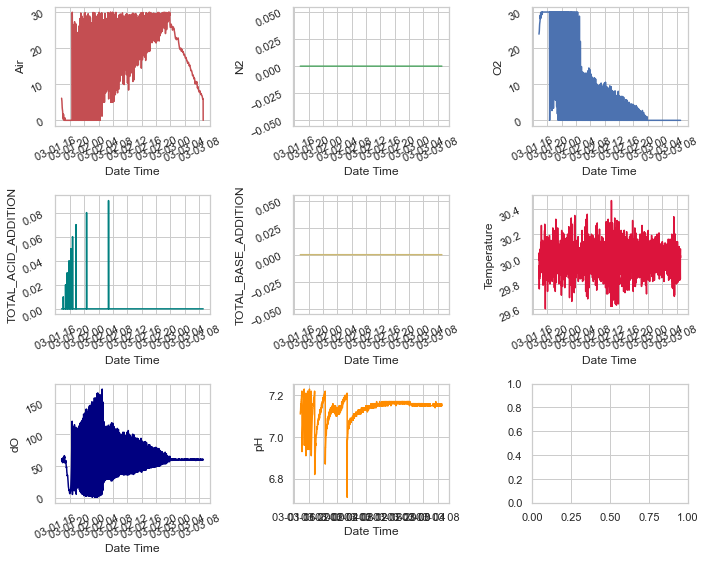

In [36]:
# visuals of time-series metrics for Fermentation 5

df = inline_data[inline_data['FermId'] == 5 ]

fig,ax =  plt.subplots( 3, 3,
                       figsize = ( 10, 8))
  
sns.lineplot( x = 'Date Time', y = 'Air', 
             color = 'r', data = df, 
             ax = ax[0][0])
  
ax[0][0].tick_params(labelrotation = 25)
sns.lineplot( x = 'Date Time', y = 'N2', 
             color = 'g', data = df,
             ax = ax[0][1])
  
ax[0][1].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'O2', 
             color = 'b', data = df,
             ax = ax[0][2])

ax[0][2].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'TOTAL_ACID_ADDITION', 
             color = 'teal', data = df,
             ax = ax[1][0])
  
ax[1][0].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'TOTAL_BASE_ADDITION', 
             color = 'y', data = df, 
             ax = ax[1][1])
  
ax[1][1].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'Temperature', 
             color = 'crimson', data = df, 
             ax = ax[1][2])

ax[1][2].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'dO', 
             color = 'navy', data = df, 
             ax = ax[2][0])

ax[2][0].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'pH', 
             color = 'darkorange', data = df, 
             ax = ax[2][1])


fig.tight_layout(pad = 1.2);

/Users/robertlewis/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/robertlewis/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/robertlewis/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


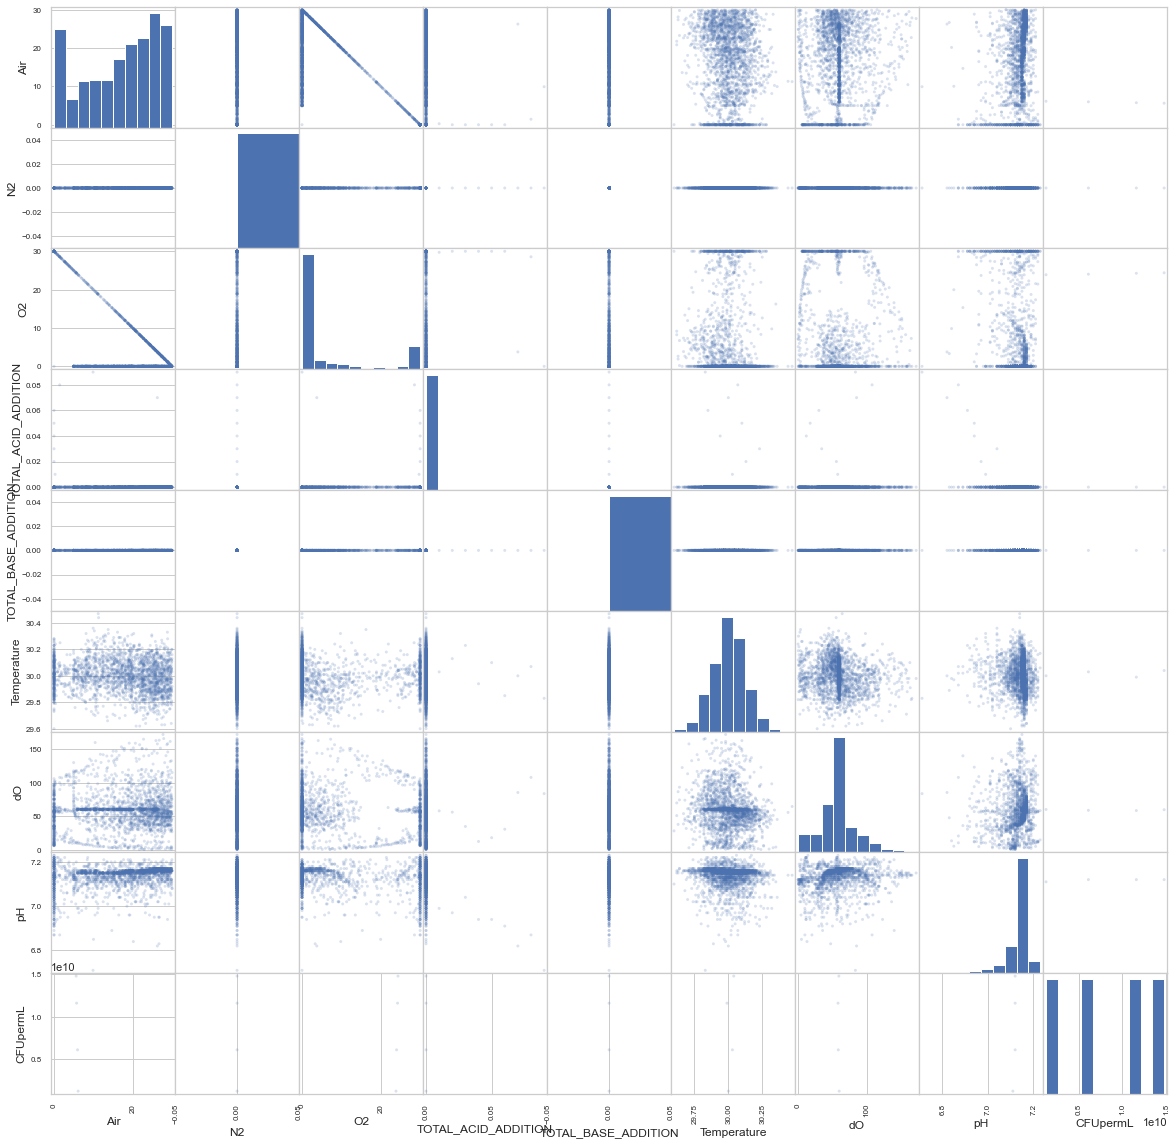

In [37]:
df = inline_data[inline_data['FermId'] == 5 ].drop(columns='FermId')
df = df.assign(CFUpermL = viability_data['ferm_CFUpermL_1'])

pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(20,20))
plt.show();

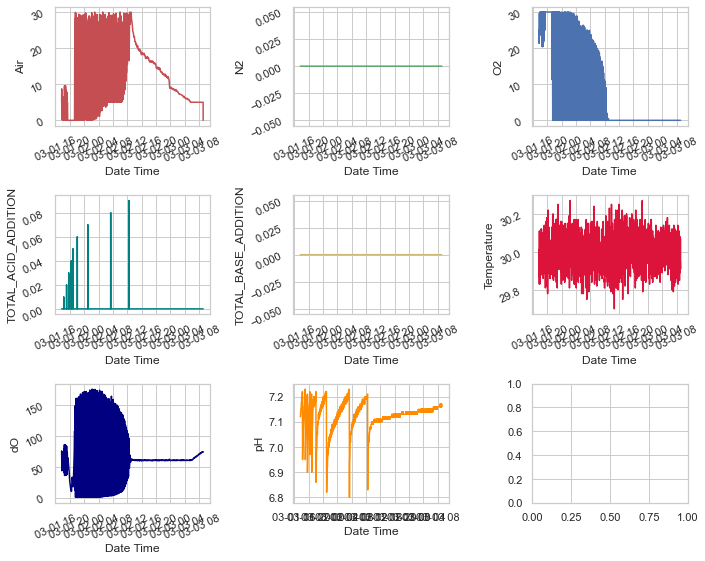

In [38]:
# visuals of time-series metrics for Fermentation 1 

df = inline_data[inline_data['FermId'] == 1 ]

fig,ax =  plt.subplots( 3, 3,
                       figsize = ( 10, 8))
  
sns.lineplot( x = 'Date Time', y = 'Air', 
             color = 'r', data = df, 
             ax = ax[0][0])
  
ax[0][0].tick_params(labelrotation = 25)
sns.lineplot( x = 'Date Time', y = 'N2', 
             color = 'g', data = df,
             ax = ax[0][1])
  
ax[0][1].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'O2', 
             color = 'b', data = df,
             ax = ax[0][2])

ax[0][2].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'TOTAL_ACID_ADDITION', 
             color = 'teal', data = df,
             ax = ax[1][0])
  
ax[1][0].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'TOTAL_BASE_ADDITION', 
             color = 'y', data = df, 
             ax = ax[1][1])
  
ax[1][1].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'Temperature', 
             color = 'crimson', data = df, 
             ax = ax[1][2])

ax[1][2].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'dO', 
             color = 'navy', data = df, 
             ax = ax[2][0])

ax[2][0].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'pH', 
             color = 'darkorange', data = df, 
             ax = ax[2][1])


fig.tight_layout(pad = 1.2);

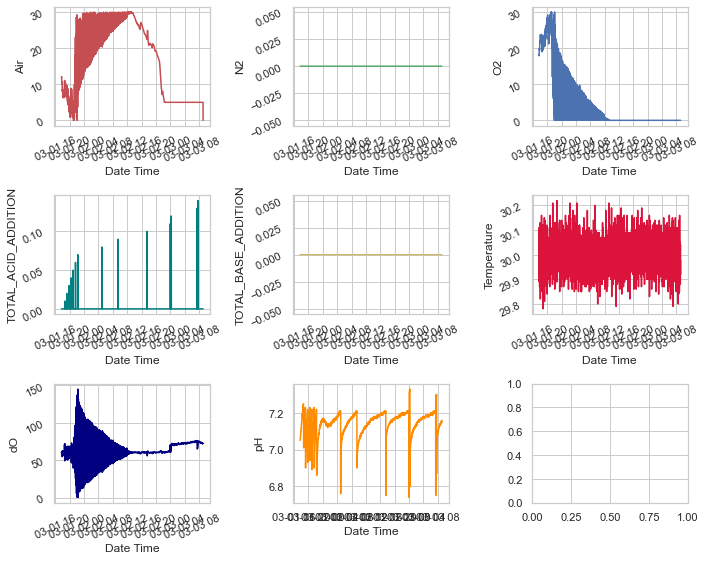

In [39]:
# visuals of time-series metrics for Fermentation 8

df = inline_data[inline_data['FermId'] == 8 ]

fig,ax =  plt.subplots( 3, 3,
                       figsize = ( 10, 8))
  
sns.lineplot( x = 'Date Time', y = 'Air', 
             color = 'r', data = df, 
             ax = ax[0][0])
  
ax[0][0].tick_params(labelrotation = 25)
sns.lineplot( x = 'Date Time', y = 'N2', 
             color = 'g', data = df,
             ax = ax[0][1])
  
ax[0][1].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'O2', 
             color = 'b', data = df,
             ax = ax[0][2])

ax[0][2].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'TOTAL_ACID_ADDITION', 
             color = 'teal', data = df,
             ax = ax[1][0])
  
ax[1][0].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'TOTAL_BASE_ADDITION', 
             color = 'y', data = df, 
             ax = ax[1][1])
  
ax[1][1].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'Temperature', 
             color = 'crimson', data = df, 
             ax = ax[1][2])

ax[1][2].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'dO', 
             color = 'navy', data = df, 
             ax = ax[2][0])

ax[2][0].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'pH', 
             color = 'darkorange', data = df, 
             ax = ax[2][1])


fig.tight_layout(pad = 1.2);

# Looking a lowest performing fermentations

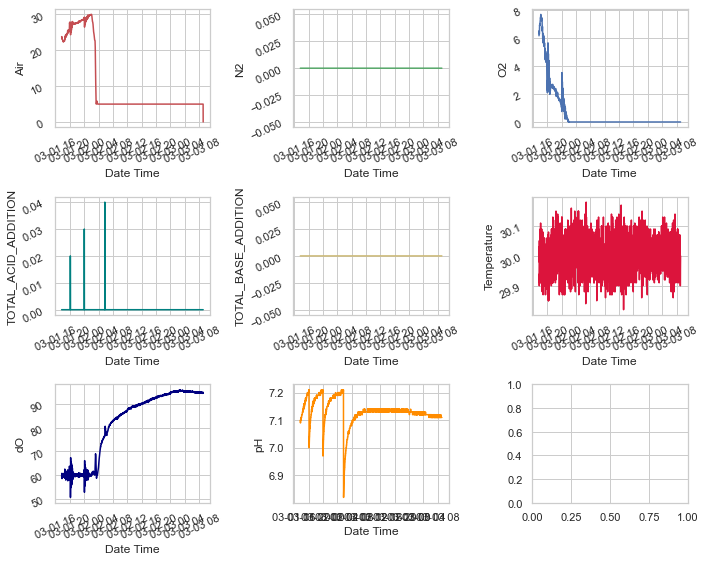

In [40]:
# visuals of time-series metrics for Fermentation 11

df = inline_data[inline_data['FermId'] == 11 ]

fig,ax =  plt.subplots( 3, 3,
                       figsize = ( 10, 8))
  
sns.lineplot( x = 'Date Time', y = 'Air', 
             color = 'r', data = df, 
             ax = ax[0][0])
  
ax[0][0].tick_params(labelrotation = 25)
sns.lineplot( x = 'Date Time', y = 'N2', 
             color = 'g', data = df,
             ax = ax[0][1])
  
ax[0][1].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'O2', 
             color = 'b', data = df,
             ax = ax[0][2])

ax[0][2].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'TOTAL_ACID_ADDITION', 
             color = 'teal', data = df,
             ax = ax[1][0])
  
ax[1][0].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'TOTAL_BASE_ADDITION', 
             color = 'y', data = df, 
             ax = ax[1][1])
  
ax[1][1].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'Temperature', 
             color = 'crimson', data = df, 
             ax = ax[1][2])

ax[1][2].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'dO', 
             color = 'navy', data = df, 
             ax = ax[2][0])

ax[2][0].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'pH', 
             color = 'darkorange', data = df, 
             ax = ax[2][1])


fig.tight_layout(pad = 1.2);

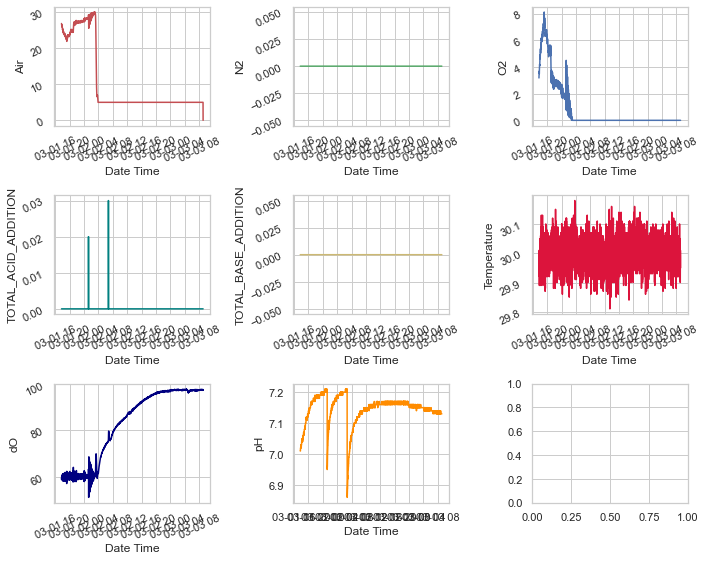

In [41]:
# visuals of time-series metrics for Fermentation 12

df = inline_data[inline_data['FermId'] == 12 ]

fig,ax =  plt.subplots( 3, 3,
                       figsize = ( 10, 8))
  
sns.lineplot( x = 'Date Time', y = 'Air', 
             color = 'r', data = df, 
             ax = ax[0][0])
  
ax[0][0].tick_params(labelrotation = 25)
sns.lineplot( x = 'Date Time', y = 'N2', 
             color = 'g', data = df,
             ax = ax[0][1])
  
ax[0][1].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'O2', 
             color = 'b', data = df,
             ax = ax[0][2])

ax[0][2].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'TOTAL_ACID_ADDITION', 
             color = 'teal', data = df,
             ax = ax[1][0])
  
ax[1][0].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'TOTAL_BASE_ADDITION', 
             color = 'y', data = df, 
             ax = ax[1][1])
  
ax[1][1].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'Temperature', 
             color = 'crimson', data = df, 
             ax = ax[1][2])

ax[1][2].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'dO', 
             color = 'navy', data = df, 
             ax = ax[2][0])

ax[2][0].tick_params(labelrotation = 25)
sns.lineplot(x = 'Date Time', y = 'pH', 
             color = 'darkorange', data = df, 
             ax = ax[2][1])


fig.tight_layout(pad = 1.2);

/Users/robertlewis/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/robertlewis/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/robertlewis/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


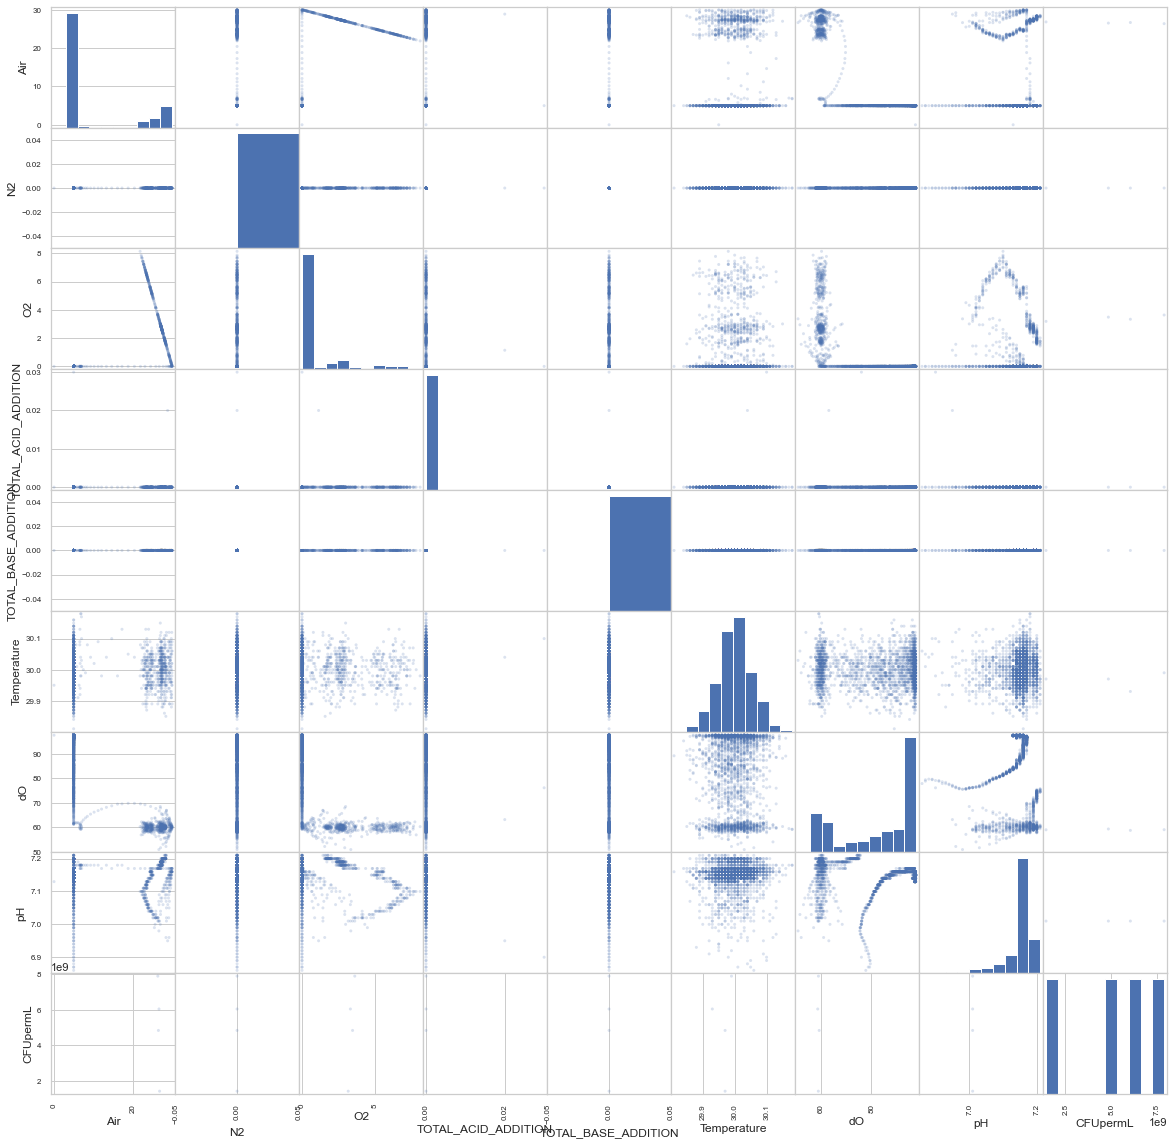

In [42]:
df = inline_data[inline_data['FermId'] == 12 ].drop(columns='FermId')
df = df.assign(CFUpermL = viability_data['ferm_CFUpermL_1'])

pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(20,20))
plt.show();

## Merging the dataframes

In [43]:
df_merged = pd.merge(pd.merge(inline_data, 
                  ferm_metadata,
                  left_on='FermId',
                  right_on='ferm_treatment_id',
                  how='left'), viability_data,
                     left_on='ferm_treatment_id',
                     right_on='ferm_treatment_id',
                     how='left')

df_merged.drop(df_merged.columns[[12,13,15,19,20,21,22,23,29,30]], axis=1, inplace=True)
df_merged.head(10)
df_merged.shape

Date Time SensorId  FermId     Air   LH   N2      O2  \
0 2022-03-01 17:43:00      CS2       1   5.015  NaN  0.0  24.985   
1 2022-03-01 17:43:00      CS2       1   5.015  NaN  0.0  24.985   
2 2022-03-01 17:43:00      CS2       1   5.015  NaN  0.0  24.985   
3 2022-03-01 17:43:00      CS2       1   5.015  NaN  0.0  24.985   
4 2022-03-01 17:43:00      CS2      10   0.000  NaN  0.0  30.000   
5 2022-03-01 17:43:00      CS2      10   0.000  NaN  0.0  30.000   
6 2022-03-01 17:43:00      CS2      10   0.000  NaN  0.0  30.000   
7 2022-03-01 17:43:00      CS2      10   0.000  NaN  0.0  30.000   
8 2022-03-01 17:43:00      CS2      11  23.814  NaN  0.0   6.186   
9 2022-03-01 17:43:00      CS2      11  23.814  NaN  0.0   6.186   

   TOTAL_ACID_ADDITION  TOTAL_BASE_ADDITION  Temperature  ...  \
0                  0.0                  0.0        29.99  ...   
1                  0.0                  0.0        29.99  ...   
2                  0.0                  0.0        29.99  ...   
3                  0.0                  0.0        29.99  ...   
4                  0.0                  0.0        30.02  ...   
5                  0.0                  0.0        30.02  ...   
6                  0.0                  0.0        30.02  ...   
7                  0.0                  0.0        30.02  ...   
8                  0.0                  0.0        30.05  ...   
9                  0.0                  0.0        30.05  ...   

   ferm_inoculation_datetime         ferm_harvest_datetime  \
0        2022-03-01 11:37:00 2022-03-03 23:59:59.999998800   
1        2022-03-01 11:37:00 2022-03-03 23:59:59.999998800   
2        2022-03-01 11:37:00 2022-03-03 23:59:59.999998800   
3        2022-03-01 11:37:00 2022-03-03 23:59:59.999998800   
4        2022-03-01 11:45:00 2022-03-04 00:00:00.000000000   
5        2022-03-01 11:45:00 2022-03-04 00:00:00.000000000   
6        2022-03-01 11:45:00 2022-03-04 00:00:00.000000000   
7        2022-03-01 11:45:00 2022-03-04 00:00:00.000000000   
8        2022-03-01 11:46:00 2022-03-03 23:59:59.999998800   
9        2022-03-01 11:46:00 2022-03-03 23:59:59.999998800   

  ferm_harvesttime_hrs ferm_plating_media_nickname  Amt_A_mL Amt_B_mL  \
0            60.383333                         PIB      0.09     0.01   
1            60.383333                         PIB      0.09     0.01   
2            60.383333                         PIB      0.09     0.01   
3            60.383333                         PIB      0.09     0.01   
4            60.250000                         PIB      0.09     0.01   
5            60.250000                         PIB      0.09     0.01   
6            60.250000                         PIB      0.09     0.01   
7            60.250000                         PIB      0.09     0.01   
8            60.233333                         PIB      0.07     0.03   
9            60.233333                         PIB      0.07     0.03   

  experiment_name_y ferm_enumerated_strain ferm_measure_timepoint  \
0              ExpA                    A_B                      6   
1              ExpA                    A_B                     12   
2              ExpA                    A_B                     24   
3              ExpA                    A_B                     36   
4              ExpA                    A_B                      6   
5              ExpA                    A_B                     12   
6              ExpA                    A_B                     24   
7              ExpA                    A_B                     36   
8              ExpA                    A_B                      6   
9              ExpA                    A_B                     12   

   ferm_CFUpermL_1  
0     1.160000e+09  
1     5.560000e+09  
2     1.600000e+10  
3     1.680000e+10  
4     3.880000e+09  
5     3.520000e+10  
6     3.160000e+10  
7     2.840000e+10  
8     9.600000e+08  
9     3.480000e+09  

[10 rows x 27 columns]

(113568, 27)

Since I want to try and stay within the 5 hr time constraints, I'll stop here and begin my summary and suggestions. I will also note that I know my merged dataframe is not perfect. Can discuss in the interview.

## Conclusions and Next Steps

### The goal of this experiment was to evaluate how strain ratio and media concentraion effect the growth of a mixture of two bacteria strains (A and B)

We are told that we're looking to <b>Maximize</b> the colony forming units per mL in the sample 
AND we'd like to <b>optimize towards a 5:5 ratio</b>

Given these constraints, I would conclude that fermentation treatments 6 & 2 showed the most promising results:

Treatment 2 -- 5:5 A_B and 100% MedA <br>
Treatment 6 -- 5:5 A_B and 200% MedA

Additionally, ALL 4 of those that produced the lowest CFU per mL were using a 50% Media formulation (strain ratios differed)

The worst 2 performing fermentation formulations (11 and 12) also showed a spike in dO

It appears from this that media concentration has a large effect on performance of fermentation. 

### Next Steps 

The first thing I would like to do would be to perform statistical testing for the 12 fermentations (ANOVA) and drill down more into the various sensor metrics to check for outliers, missing data that I may have skipped, finish cleaning (rename cols), look for any anomolies. I was hoping to have a single plot of the 6 numerical sensor metrics, with a dropdown to filter by ferm_treatment_id -- I think this would have helped compare the various treatments. 

Unfortunately, I didn't have time to try and model optimal conditions

To do this, I would first be sure the merged data was completely clean. My 'X' set of features would include all but the CFUpermL , which would be the target variable. Categorical data, such as 'strain_ratio', 'fermId', would need to be one-hot encoded to be used with any ML algorithm.

Features would need to be scaled and normalized. I would then want to remove any redundant information which could be done through a correlation matrix of the features. Any above a certain corr level could be removed. This ensures less complexity for the ML model. Another method of feature selection, PCA, could be used to reduce the data into its components. 

When picking algorithms to try I would want to focus on Supervised Learning techniques, namely Naive Bayes, Decision Tree, SVM, or Regression

### Questions, Concerns and Feedback

First of all, I'd like to say that I really enjoyed this exercise. It was challenging, but the data was very interesting and there were PLENTY of opportunities for data cleaning.

On the note of Data Quality:

<b>ferm_metadata</b> : This data was in relatively good shape. The biggest changes I made after reading in the data was removing 327 rows of empty data, adding harvest time in hrs to the innoculation datetime, changed a few datatypes and I split the strain ratio into respective columns of A and B (wasn't sure if I would need it later).
    
<b>viability_data</b> : Much like the ferm_metadata, I found this data relatively clean. I changed datatypes where appropriate, I also removed all but the 'A_B' assay data (unsure if this was correct). Thought about changing the measure_timepoint to minutes but left as is. Thinking there may have been a better way to format the concentration numbers as well.
    
<b>inline_data</b> : This is where the bulk of my time was spent. The first thing I noticed was that the original data was very 'wide' due to the columns having 'Sensor-FermentationId-Metric' format (i.e. Data from the CS2 sensor, for fermentation treatment 3, dO would be written 'CS2-3-dO'). I split the column names on the '-' delimiter and stacked the data so that the sensor and fermentor ids would be in 2 new columns followed by the sensor metrics. A part from that, I also made appropriate adjustments to the data types and filled in NaN values.
    
<b>Other observations</b>: While the .doc file says the inline data generated contains 2 sensor stations (CS1 & CS2), only CS2 was present. Either CS1 was faulty or turned off, but appears not to have recorded information. When looking at the 2 poorest performing fermentations, it appears the dO spiked during the run (corresponding to a drop in O2 input). 



